<a href="https://colab.research.google.com/github/FerrazThales/recomendador_youtube/blob/main/Recomendador_de_V%C3%ADdeos_do_Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>Encontre eu e meus projetos nas redes sociais!</b></h1>
<table>
  <tr>
  <td><a href="https://thalesferraz.medium.com/">
  <img src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true" width="800" title="Olá, Meu nome é Thales e sou cientista de Dados!"/>
  </a>
  </td>
  <td><a href="https://github.com/FerrazThales">
  <img hspace=30 vspace=110 src="https://image.flaticon.com/icons/png/512/1051/1051326.png" width="60%" title="Entre em meu Github e veja mais projetos!" /> 
  </a>
  </td>
  <td>
  <a href="">
  <img vspace=110 src="https://download.logo.wine/logo/Medium_(website)/Medium_(website)-Logo.wine.png" width="800" title="Veja este meu projeto no Medium!"/>
  </a>
  </td>
  <td><a href="https://www.linkedin.com/in/thalesdefreitasferraz/"><img vspace=150 src="https://image.flaticon.com/icons/png/512/889/889122.png" width="40%" title="Vamos trocar uma idéia sobre Data Science no LinkedIn?" />
  </a>
  </td>
  </tr>
</table>

Este projeto faz parte de um **desafio** proposto no [Curso de Data Science](https://curso.mariofilho.com/) do **Mario Filho**. 

O `Mario` possui o nobílissimo título de *Kaggle* **Grandmaster** e é, na minha opinião, o **melhor** Cientista de Dados do Brasil.

Para mais informações sobre ele, procure em:

* [LinkedIn](https://br.linkedin.com/in/mariofilho)
* [Youtube](https://www.youtube.com/c/MarioFilhoML) <- *tem vídeo bom demais da conta*!
* [Kaggle](https://www.kaggle.com/mariofilho)

# O que você vai aprender neste projeto:

* Como funciona os sistemas de **recomendação** do Youtube.
* Uma **API** para realizar a extração das principais **features** dos vídeos.
* O que é **Active Learning** e sua importância para o aprendizado **supervisionado**.
* Diferentes algoritmos de **classificação**.
* **Deploy** de um modelo de *Machine Learning* utilizando **Heroku**.

#Identificação do Problema

Com o **aumento** de dados e usuários, os [sistemas de recomendação](https://www.analyticsvidhya.com/blog/2021/07/recommendation-system-understanding-the-basic-concepts/) se tornaram cada vez mais **relevantes** no cenário competitivo da *internet*. Hoje existem **variados** sistemas que se baseiam em **diferentes** técnicas que tentam acertar a **preferência** dos usuários da maneira mais exata possível. Estes **algoritmos** podem, por exemplo, se respaldar nos seus últimos **filmes** vistos ou **compras** realizadas. Ou até mesmo, pode **supor** que você faz parte de uma **comunidade** (*matemática*) **imaginária** que ama **vídeos** aleatórios de animais marinhos.

Sabemos que errar é **humano**. Mas a experiência do dia a dia na rede nos aponta que os **algoritmos** também erram. Muitas **recomendações** são feitas porque várias pessoas caíram em [ClickBaits](https://rockcontent.com/br/blog/clickbait/) e o algoritmo **espera** (com altíssima estimativa de **probabilidade**) que você seja o **próximo**.

Em geral, os sistemas de **recomendação** de vídeos são baseados nas **atividades** dos usuários nos sites. O mais **popular** site de vídeos do mundo, o [Youtube](https://www.youtube.com/), possuí muito conteúdo **personalizado** dos usuários para implementar um bom algoritmo de **recomendação**. No entanto, essa quantidade de dados também pode apresentar grandes **desafios** aos engenheiros de *machine learning*  do **Youtube**. 

[A cada minuto o Youtube recebe mais de 24 horas de upload](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.434.9301&rep=rep1&type=pdf). Mesmo já conhecendo algumas **labels** em seus sistemas, como: *like*, playlists, assitir mais tarde,*etc*. Combinar todas as *features* necessárias e associar a **regras** que ajudem em recomendações **assertivas** desconhecendo o conteúdo **real** desses novos vídeos é uma tarefa **árdua**.

Por conta disso, desde **2008** o *Youtube* vem **aprimorando** o seu sistema de recomendação. A imagem abaixo ilustra os momentos **chave** da formulação deste sistema. [Fonte da imagem](https://blog.youtube/inside-youtube/on-youtubes-recommendation-system/)

<center><img src="https://storage.googleapis.com/gweb-uniblog-publish-prod/images/BINK_YouTube_Recommendations_V5.max-1000x1000.png" width="50%"></center>

Geralmente, após realizados todos ajustes necessários no algoritmo, o **Youtube** utiliza [testes estatísticos](https://resultadosdigitais.com.br/blog/o-que-e-teste-ab/) para avaliar a **perfomance** do sistema já em produção. Mas e se você pudesse de alguma forma **intervir** nisso? Ajudar a **refinar** um pouco mais este algoritmo e trazer uma **seleção** de vídeos mais **agradáveis** para você?

Com estas ideias em mente, o **objetivo** deste projeto é **recriar** de uma forma simples o **algoritmo** de recomendação do **Youtube**. Inicialmente, nós utilizaremos uma `api`, o [youtube-dl](https://youtube-dl.org/), para extrair as **características** dos vídeos. A partir destes dados avaliaremos qual o vídeo é mais interessante de acordo com as minhas opiniões.


In [77]:
#utilizando os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Preparação dos Dados

Quando não temos acesso **direto** aos dados em um arquivo em `excel` ou `csv`, por exemplo, podemos buscá-los na web através de uma técnica chamada de [Web Scraping](https://www.tecmundo.com.br/internet/215525-web-scraping-conheca-tecnica-coleta-dados.htm). Algumas bibliotecas do python nos ajudam muito neste empreitada:

* [BeatifoulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/) - Um pacote muito utilizado pelos cientistas de dados que nos ajuda a analisar documentos HTML e XML.
* [Scrapy](https://scrapy.org/) -  Um framework que nos auxilia na extração de dados de websites de uma forma simples,direta e rápida.
* [youtube_dl](https://github.com/ytdl-org/youtube-dl) - Geralmente é útil procurar como outras pessoas já resolveram os problemas, afinal o Web Scraping no Youtube não é algo tão incomum. O `youtube_dl` é uma *api* já preparada para o scraping neste site e será utilizada neste projeto.

In [ ]:
#instalando a biblioteca de extração de dados do youtube
!pip install youtube_dl -q

Lá em cima, já comentamos que iríamos usar uma `api` neste projeto. Utilizamos alguns **parâmetros** desta biblioteca para facilitar nossa análise:
* `ignoreerrors`: ignora os erros para não travar a busca.
* `quiet`: não printa cada iteração.
* `no_warnings`: não printa os warnings da api.

**Obs: você pode encontrar todos os parâmetros digitando:** `?youtube_dl.YoutubeDL`

In [ ]:
#importando a biblioteca do youtube_dl
import youtube_dl

# instanciando o youtube_dl, além do YT é possível escolher outros sites
ydl = youtube_dl.YoutubeDL(params={'ignoreerrors':True,'quiet':True, 
                                   'no_warnings':True})

#palavras chave que serão buscadas no YT
palavras_chave = ['cortes+podcast','podcast','cortes']

In [ ]:
#extraindo JSONS das novas pesquisas
resultados = []
for palavra_chave in palavras_chave:
    #download foi setado como False para não ser realizado o download do Vídeo
    r = ydl.extract_info(f'ytsearchdate500:{palavra_chave}', download=False)
    for entry in r['entries']:
        #algumas entradas vêm vazias e não interessam para nossa análise
        if entry is not None:
            entry['key_word'] = palavra_chave
    #guardar tudo em uma lista
    resultados += r['entries']

ERROR: Sign in to confirm your age
This video may be inappropriate for some users.
ERROR: No video formats found; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
ERROR: No video formats found; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
ERROR: No video formats found; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
ERROR: No video formats found; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https

falar de filtrar valores vazios

os erros sãs os vazios

In [ ]:
#tamanho da lista dos resultados
print('Foi extraído {:,} registros.'.format(len(resultados)).replace(',','.'))

#verificar se há algo vazio dentre os valores
vazios = []
for resultado in resultados:
  if resultado is None:
    vazios.append(resultado)
print('Destes {} são registros vazios.'.format(len(vazios)))

Foi extraído 1.368 registros.
Destes 67 são registros vazios.


In [ ]:
#retirar registros vazios da lista
resultados_sem_vazios = [i for i in resultados if i is not None]

#avaliando a quantidade de registros final
print('Quantidade de registros após a filtragem: {:,}'.format(len(resultados_sem_vazios)).replace(',','.'))

Quantidade de registros após a filtragem: 1.301


Extraimos os vídeos **relacionados** a `cortes+podcast` e `palmeiras` e **guardamos** na variável `r`. Esta variável contém um arquivo no formato [JSON](https://pt.wikipedia.org/wiki/JSON), um tipo muito parecido com os **dicionários**.

Se dermos uma olhada no parâmetro `entries` observamos que lá tem tudo que precisamos, as **principais** características dos vídeos extraídos.

<center><img src="https://github.com/FerrazThales/recomendador_youtube/raw/main/base_de_dados/r_entries.png"></center>

Depois disso, criamos mais uma chave: a `key_word`. Ela é muito importante para identificar **qual** foi a palavra chave que utilizamos nas **buscas** dos vídeos. 

Por fim, guardamos tudo em uma **lista** e criamos um [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) do Pandas para melhor **visualizar** nossos resultados.

In [ ]:
#armanzenando os resultados em um DataFrame
df = pd.DataFrame(resultados_sem_vazios)

#exibindo as 5 primeiras entradas do DataFrame
df.head()

,id,title,formats,thumbnails,description,upload_date,uploader,uploader_id,uploader_url,channel_id,channel_url,duration,view_count,average_rating,age_limit,webpage_url,categories,tags,is_live,automatic_captions,subtitles,like_count,channel,extractor,webpage_url_basename,extractor_key,n_entries,playlist,playlist_id,playlist_title,playlist_uploader,playlist_uploader_id,playlist_index,thumbnail,display_id,requested_subtitles,requested_formats,format,format_id,width,height,resolution,fps,vcodec,vbr,stretched_ratio,acodec,abr,ext,key_word,track,artist,album,creator,alt_title,location,license,url,manifest_url,tbr,protocol,preference,http_headers,chapters
0,hHgT18YeMJo,JUNINHO DA 10 FALA DO POZE DO RODO -CORTES POD...,"[{'asr': 48000, 'filesize': 873691, 'format_id...","[{'height': 94, 'url': 'https://i.ytimg.com/vi...",,20211218,CORTES PODCAST RJ,UCMgGVUbs-3WtY-T21gbbIww,http://www.youtube.com/channel/UCMgGVUbs-3WtY-...,UCMgGVUbs-3WtY-T21gbbIww,https://www.youtube.com/channel/UCMgGVUbs-3WtY...,141.0,7,None,0,https://www.youtube.com/watch?v=hHgT18YeMJo,[People & Blogs],[],None,"{'af': [{'ext': 'srv1', 'url': 'https://www.yo...",{},0.0,CORTES PODCAST RJ,youtube,hHgT18YeMJo,Youtube,500,cortes+podcast,cortes+podcast,None,None,None,1,https://i.ytimg.com/vi/hHgT18YeMJo/hqdefault.j...,hHgT18YeMJo,None,"({'asr': None, 'filesize': 39404327, 'format_i...",315 - 2328x2160 (2160p60)+140 - audio only (tiny),315+140,2328,2160,NaN,60.0,vp9,2231.496,NaN,mp4a.40.2,129.514,webm,cortes+podcast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c6wfeM5SAkU,MC Juninho da 10 no trap - Cortes Podcast Rj,"[{'asr': 48000, 'filesize': 97091, 'format_id'...","[{'height': 94, 'url': 'https://i.ytimg.com/vi...",,20211218,CORTES PODCAST RJ,UCMgGVUbs-3WtY-T21gbbIww,http://www.youtube.com/channel/UCMgGVUbs-3WtY-...,UCMgGVUbs-3WtY-T21gbbIww,https://www.youtube.com/channel/UCMgGVUbs-3WtY...,15.0,0,None,0,https://www.youtube.com/watch?v=c6wfeM5SAkU,[People & Blogs],[],None,"{'af': [{'ext': 'srv1', 'url': 'https://www.yo...",{},0.0,CORTES PODCAST RJ,youtube,c6wfeM5SAkU,Youtube,500,cortes+podcast,cortes+podcast,None,None,None,2,https://i.ytimg.com/vi_webp/c6wfeM5SAkU/maxres...,c6wfeM5SAkU,None,"({'asr': None, 'filesize': 848722, 'format_id'...",271 - 720x1280 (720p)+140 - audio only (tiny),271+140,720,1280,NaN,30.0,vp9,452.681,NaN,mp4a.40.2,130.147,webm,cortes+podcast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6Jju_-yjWls,ARUAN ESPOEM YOUTUBERS | Raio Cortes Podcast,"[{'format_id': '139', 'manifest_url': 'https:/...","[{'height': 94, 'url': 'https://i.ytimg.com/vi...",Tiktok:@raiocortespodcast\n\nCréditos: @Flowpo...,20211217,Raio Cortes Podcast,UCSAJHmAVzajY0LbnF_rrDDg,http://www.youtube.com/channel/UCSAJHmAVzajY0L...,UCSAJHmAVzajY0LbnF_rrDDg,https://www.youtube.com/channel/UCSAJHmAVzajY0...,275.0,2,None,0,https://www.youtube.com/watch?v=6Jju_-yjWls,[People & Blogs],[],None,"{'af': [{'ext': 'srv1', 'url': 'https://www.yo...",{},1.0,Raio Cortes Podcast,youtube,6Jju_-yjWls,Youtube,500,cortes+podcast,cortes+podcast,None,None,None,3,https://i.ytimg.com/vi/6Jju_-yjWls/hqdefault.j...,6Jju_-yjWls,None,"({'format_id': '248', 'manifest_url': 'https:/...",248 - 1920x1080 (DASH video)+140 - audio only ...,248+140,1920,1080,NaN,30.0,vp9,NaN,NaN,mp4a.40.2,129.492,webm,cortes+podcast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4m2EAlU1W4o,COMO FOI MORAR COM A BREAKMEN NOS EUA (ARUAN) ...,"[{'asr': 48000, 'filesize': 2566643, 'format_i...","[{'height': 94, 'url': 'https://i.ytimg.com/vi...",Curso VIVER DE YOUTUBE: https://bit.ly/2NvrVtW...,20211217,Cortes Podcast,UCGBPo-CBLiMKxivaiF-MBiA,http://www.youtube.com/channel/UCGBPo-CBLiMKxi...,UCGBPo-CBLiMKxivaiF-MBiA,https://www.youtube.com/channel/UCGBPo-CBLiMKx...,414.0,9711,None,0,https://www.youtube.com/watch?v=4m2EAlU1W4o,[Entertainment],"[flow podcast, flow, podcast, cortes podcast, ...",None,"{'af': [{'ext': 'srv1', 'url': 'https://www.yo...",{},656.0,Cortes Podcast,youtube,4m2EAlU1W4o,Youtube,500

tipo de dados,quantidade de registros e variáveis 

In [ ]:
#avaliando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1301 non-null   object 
 1   title                 1301 non-null   object 
 2   formats               1301 non-null   object 
 3   thumbnails            1301 non-null   object 
 4   description           1301 non-null   object 
 5   upload_date           1301 non-null   object 
 6   uploader              1301 non-null   object 
 7   uploader_id           1301 non-null   object 
 8   uploader_url          1301 non-null   object 
 9   channel_id            1301 non-null   object 
 10  channel_url           1301 non-null   object 
 11  duration              1300 non-null   float64
 12  view_count            1301 non-null   int64  
 13  average_rating        0 non-null      object 
 14  age_limit             1301 non-null   int64  
 15  webpage_url          

verificar dados duplicados

In [ ]:
#verificar linhas que foram duplicadas
duplicados = df[df.duplicated(subset='webpage_url',keep=False)]

#verificando os titulos que estão duplicados
duplicados.title.value_counts()

DIFERENÇA DAS MULHERES DO EUA X BRASIL | Cortes Podcast                                         3
A FAROFA DA GKAY | Cortes Podcast                                                               3
COMO É FICAR CARA A CARA COM PSICOPATAS | Cortes Podcast                                        3
O PODCAST QUE MAIS ODEIA O FLOW | Cortes do Flow                                                3
ENTENDA A LAVA JATO DE UMA VEZ POR TODAS (JUIZ FEDERAL) | Cortes Podcast                        2
COMO FOI MORAR COM A BREAKMEN NOS EUA (ARUAN)  | Cortes Podcast                                 2
IGOR COBRA RONALDO FENÔMENO AO VIVO | Cortes do Flow                                            2
CONVIDADO CONTA HISTORIA EMOCIONANTE SOBRE SEU FILHO | Cortes Podcast                           2
COMO É SER NINFOMANÍACA | Cortes Podcast                                                        2
A POLÊMICA DA PLACA DE 100K (ARUAN) | Cortes Podcast                                            2
MONARK E NIKOLAS DEB

In [ ]:
#dropando os dados duplicados
df.drop_duplicates(subset='webpage_url',inplace=True)

In [ ]:
#visualizando quantidade final de registros
df.shape

(1246, 64)

## Exportando o banco de dados para CSV para rotulação manual

texto texto google sheets

In [ ]:
#exportando para um arquivo excel
df.to_excel('videos_de_podcast_youtube.xlsx')

falar que rotulou,explicar active learning

In [10]:
#importando dados rotulados
df_com_rotulo = pd.read_excel('/content/videos_de_podcast_youtube_com_rotulos.xlsx',index_col='id')

## Análise Exploratória dos dados

texto texto texto

In [11]:
df_com_rotulo.columns

Index(['Unnamed: 0', 'title', 'formats', 'thumbnails', 'description',
       'upload_date', 'uploader', 'uploader_id', 'uploader_url', 'channel_id',
       'channel_url', 'duration', 'view_count', 'average_rating', 'age_limit',
       'webpage_url', 'rotulo_thales', 'categories', 'tags', 'is_live',
       'automatic_captions', 'subtitles', 'like_count', 'channel', 'extractor',
       'webpage_url_basename', 'extractor_key', 'n_entries', 'playlist',
       'playlist_id', 'playlist_title', 'playlist_uploader',
       'playlist_uploader_id', 'playlist_index', 'thumbnail', 'display_id',
       'requested_subtitles', 'requested_formats', 'format', 'format_id',
       'width', 'height', 'resolution', 'fps', 'vcodec', 'vbr',
       'stretched_ratio', 'acodec', 'abr', 'ext', 'key_word', 'track',
       'artist', 'album', 'creator', 'alt_title', 'location', 'license', 'url',
       'manifest_url', 'tbr', 'protocol', 'preference', 'http_headers',
       'chapters'],
      dtype='object')

dados ausentes

In [13]:
(df_com_rotulo.isnull().sum()/df_com_rotulo.shape[0]).sort_values(ascending=False).to_frame('Dados Ausentes')

,Dados Ausentes
playlist_uploader_id,1.0
resolution,1.0
stretched_ratio,1.0
playlist_uploader,1.0
playlist_title,1.0
...,...
extractor_key,0.0
webpage_url_basename,0.0
extractor,0.0
channel,0.0


In [76]:
#criando um DataFrame Apenas com os videos que gostei
canais_que_gostei = df_com_rotulo[df_com_rotulo.rotulo_thales == 1]

#coisas gerais sobre os vídeos
print('Tempo médio dos vídeos que gostei: {:.2f} segundos.'.format(canais_que_gostei.duration.mean()))
print('Número de visualizações médias dos vídeos que gostei: {:.2f}'.format(canais_que_gostei.view_count.mean()))
print('Principal categoria de vídeo: {}'.format(canais_que_gostei.categories.value_counts().index[0].split("'")[1]))

#top 5 canais que gostei
canais_que_gostei.channel.value_counts()[:5].to_frame('Top 5 Canais que gostei')

Tempo médio dos vídeos que gostei: 783.98 segundos.
Número de visualizações médias dos vídeos que gostei: 173028.83
Principal categoria de vídeo: Entertainment


,Top 5 Canais que gostei
Cortes Podcast,33
Cortes Podcast One,14
F.C Cortes,11
Cortes do Flow [OFICIAL],10
Cortes do Inteligência [OFICIAL],6


visualizações

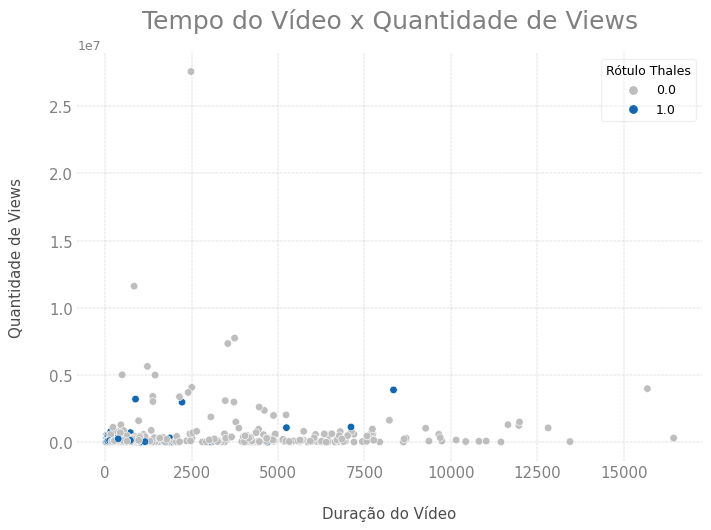

In [132]:
#criando o fig e o ax no matplotlib
fig,ax = plt.subplots(figsize=(8,6),dpi=90)

#criando o gráfico
sns.scatterplot(x='duration',y='view_count',hue='rotulo_thales',
                data=df_com_rotulo,ax=ax,palette=['#BEBEBE','#1167b1'])
ax.set_frame_on(False)
ax.tick_params(axis='both',colors='grey',length=0,labelsize=12)
ax.set_xlabel('Duração do Vídeo',labelpad=20,fontdict={'fontsize':12},color='#4c4c4c')
ax.set_ylabel('Quantidade de Views',labelpad=20,fontdict={'fontsize':12},color='#4c4c4c')
ax.legend(loc='best',title='Rótulo Thales',framealpha=0.3)
ax.set_title('Tempo do Vídeo x Quantidade de Views',loc='center',pad=20,fontdict={'fontsize':20},color='grey')
ax.grid(linestyle='-.',lw=0.3,aa=True)

#plotando os gráficos
plt.tight_layout();

histograma de todos são bem semlehantes

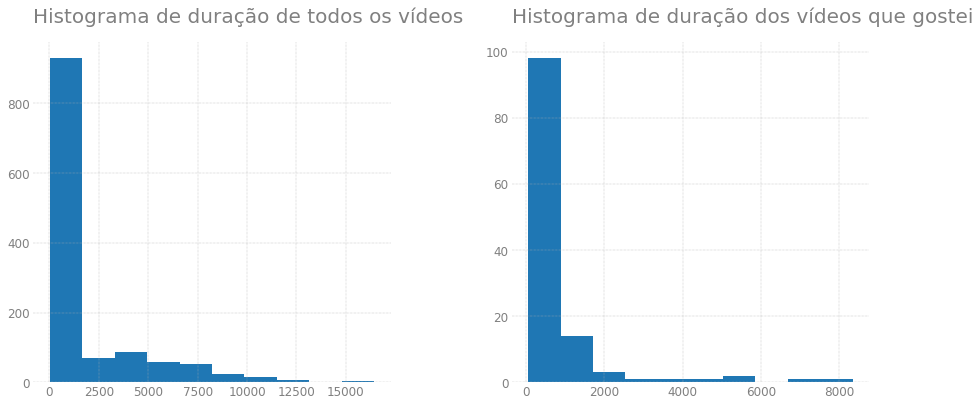

In [122]:
#criando o fig e o ax no matplotlib
fig,ax = plt.subplots(figsize=(14,6),ncols=2)

#criando um histograma do tempo para todos os vídeos
df_com_rotulo.duration.hist(ax=ax[0])
ax[0].set_frame_on(False)
ax[0].grid(linestyle='-.',lw=0.34,aa=True)
ax[0].set_title('Histograma de duração de todos os vídeos',loc='left',pad=20,fontdict={'fontsize':20},color='grey')
ax[0].tick_params(axis='both',colors='grey',length=0,labelsize=12)

#criando um histograma do tempo para os vídeos que gostei
canais_que_gostei.duration.hist(ax=ax[1])
ax[1].set_frame_on(False)
ax[1].grid(linestyle='-.',lw=0.34,aa=True)
ax[1].set_title('Histograma de duração dos vídeos que gostei',loc='left',pad=20,fontdict={'fontsize':20},color='grey')
ax[1].tick_params(axis='both',colors='grey',length=0,labelsize=12)

#plotando os gráficos
plt.tight_layout(pad=2.0);

In [138]:
df_com_rotulo.tags[4]

"['flow podcast', 'flow', 'podcast', 'cortes podcast', 'cortes do flow', 'talk flow', 'podpah', 'cortes podpah']"

In [142]:
df_com_rotulo.tags

id
hHgT18YeMJo                                                   []
c6wfeM5SAkU                                                   []
6Jju_-yjWls                                                   []
4m2EAlU1W4o    ['flow podcast', 'flow', 'podcast', 'cortes po...
dktR8fv98CI    ['flow podcast', 'flow', 'podcast', 'cortes po...
                                     ...                        
2QbPdCYi1vc    ['ideas y manualidades', 'ideas', 'manualidade...
8ovo-qiJNDI    ['CORTES DE PELO RIZADO', 'CORTES PARA PELO RI...
SNV3M17LPaA    ['CORTES DE PELO PARA SEÑORAS', 'CORTES DE CAB...
SlYirTsPaEI                                                   []
t-_uVyDzH1E                                                   []
Name: tags, Length: 1246, dtype: object

In [ ]:
for tag in df_com_rotulo.tags[:5]:
  


In [ ]:
resultados_sem_vazios = [i for i in resultados if i is not None]

In [156]:
lista = df_com_rotulo.tags[3].split("'")
lista_sem_pontuacoes = [i for i in lista if i]

['[',
 'flow podcast',
 ', ',
 'flow',
 ', ',
 'podcast',
 ', ',
 'cortes podcast',
 ', ',
 'cortes do flow',
 ', ',
 'talk flow',
 ', ',
 'podpah',
 ', ',
 'cortes podpah',
 ']']

In [157]:
lista = df_com_rotulo.tags[3].split("'")

In [160]:
for elemento in lista:
  if elemento.contains(','):
    print(elemento)

AttributeError: ignored

## Escolha das Features
- dropar
- pipeline
- normalização
-treino e teste

In [ ]:
#
manter = ['title','description','description','tags','upload_date','uploader','duration','view_count','rotulo_thales','categories']

#Modelagem

texto texto

random forest

#Colocando em *Produção*

texto texto

#Conclusões

* x
* x
* uso de NLP
* x